In [6]:
pip install filterpy

  Using cached filterpy-1.4.5.zip (177 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=d1b534e52522d846c6c9c5268440d55528eab35b1f01edfe1cc3377ca7944431
  Stored in directory: /home/ksk/.cache/pip/wheels/fe/f6/cb/40331472edf4fd399b8cad02973c6acbdf26898342928327fe
Successfully built filterpy

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


- https://cocalc.com/share/public_paths/7557a5ac1c870f1ec8f01271959b16b49df9d087/07-Kalman-Filter-Math.ipynb

In [7]:
from __future__ import division
import numpy as np
from numpy.random import randn
from filterpy.kalman import KalmanFilter

# 1-D Kalman filter equations
def predict(pos, variance, movement, movement_variance):
    return (pos + movement, variance + movement_variance)


def update (mu1, var1, mu2, var2):
    mean = (var1*mu2 + var2*mu1) / (var1+var2)
    variance = 1 / (1/var1 + 1/var2)
    return (mean, variance)

In [27]:
from filterpy.kalman import KalmanFilter

def mkf_filter(R, Q):
    f = KalmanFilter(dim_x=1, dim_z=1, dim_u=1)
    f.P = np.array([[500.]])
    f.H = np.array([[1.]])
    f.F = np.array([[1.]])
    f.B = np.array([[1.]])
    f.Q = Q
    f.R = R
    
    return f

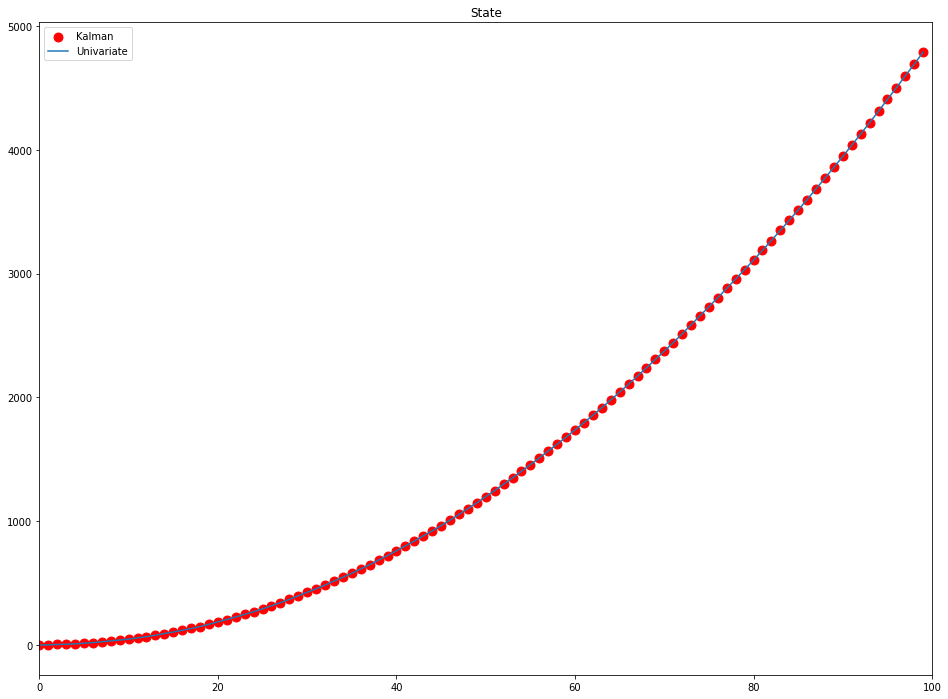

<Figure size 432x288 with 0 Axes>

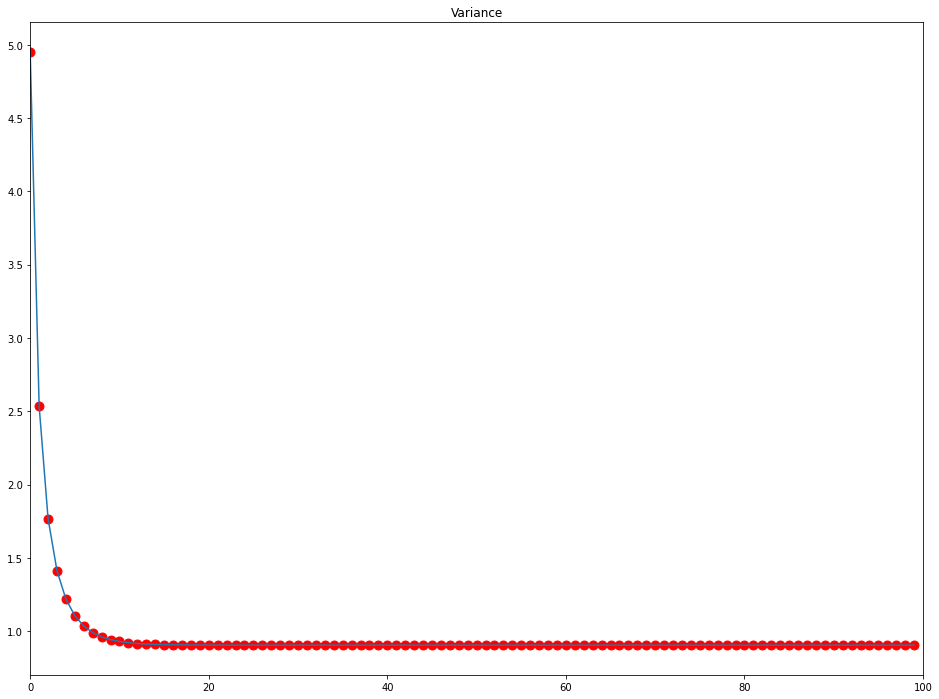

In [78]:
import matplotlib.pyplot as plt

def plot_kf_compare(x0, p0, R, Q, move):
    # storage for filter output
    x_uni, x_kf = [], []
    p1, p2 = [], []

    # initialize the filters
    f = mkf_filter(R, Q)
    
    f.x[0] = 0.
    f.P[0, 0] = p0
    pos = (x0, p0)
    acc = 0.5
    
    for i in range(100):
        z = i*move + randn()
        pos = update(pos[0], pos[1], z, R)
        f.update(z)

        x_uni.append(pos[0])
        x_kf.append(f.x[0])

        p1.append(pos[1])
        p2.append(f.P[0, 0])
        
        move += acc

        u = move + randn()
        pos = predict(pos[0], pos[1], u, Q)
        f.predict(u=u)
        
        
    plt.figure(figsize=(16,12))

    plt.scatter(range(len(x_kf)), x_kf, c='r', s=80, label='Kalman')
    plt.title('State')
    plt.plot(x_uni, label='Univariate')
    
    plt.xlim([0, 100])
    plt.legend()

    plt.figure()
    
    plt.figure(figsize=(16,12))
    
    plt.plot(p1)
    
    plt.scatter(range(len(x_kf)), p2, c='r', s=80)
    plt.title('Variance')
    plt.xlim([0, 100])
    plt.show()
    
plot_kf_compare(x0=0., p0=500., R=5., Q=.2, move=1.)

In [39]:
print(randn())

1.0310654780236461
